In [1]:
# THE OBJECTIVE OF MY MACHINE LEARNING MODEL IS TO PREDICT WHETHER OR NOT A PATIENT WOULD BE READMITTED 

# DATA INGESTION

In [2]:
# Importing libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import AllKNN

In [3]:
pd.options.display.min_rows = 40000
pd.options.display.max_seq_items = 40000

In [4]:
df = pd.read_csv("diabetic_data.csv", low_memory=False)

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
df.shape

(101766, 50)

# DATA VISUALIZATION

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10;

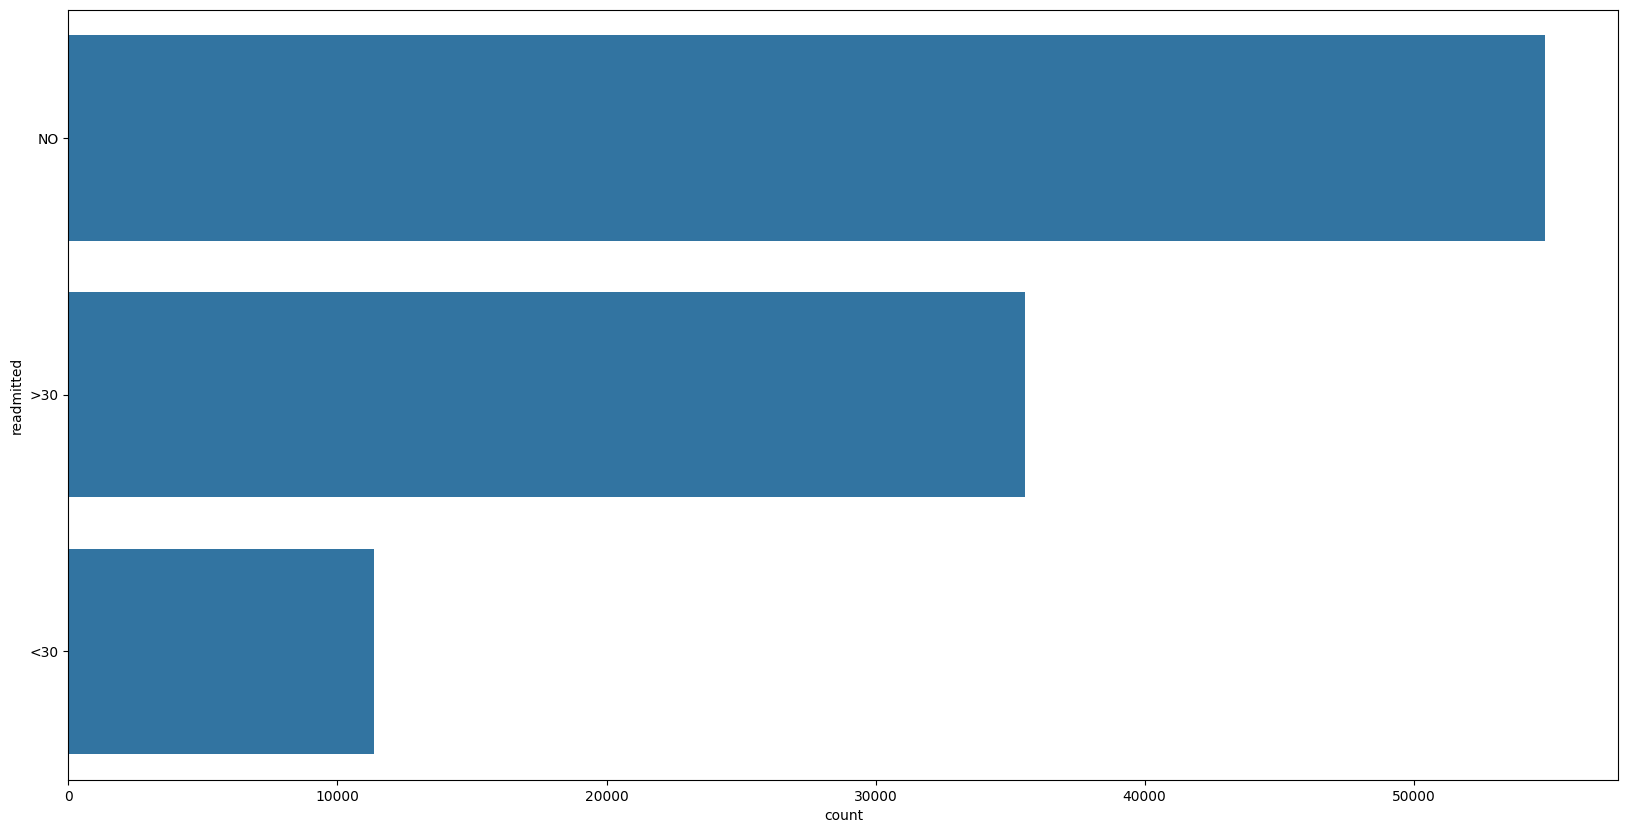

In [9]:
_ = sns. countplot(y = 'readmitted', data = df, order = df.readmitted.value_counts().index)

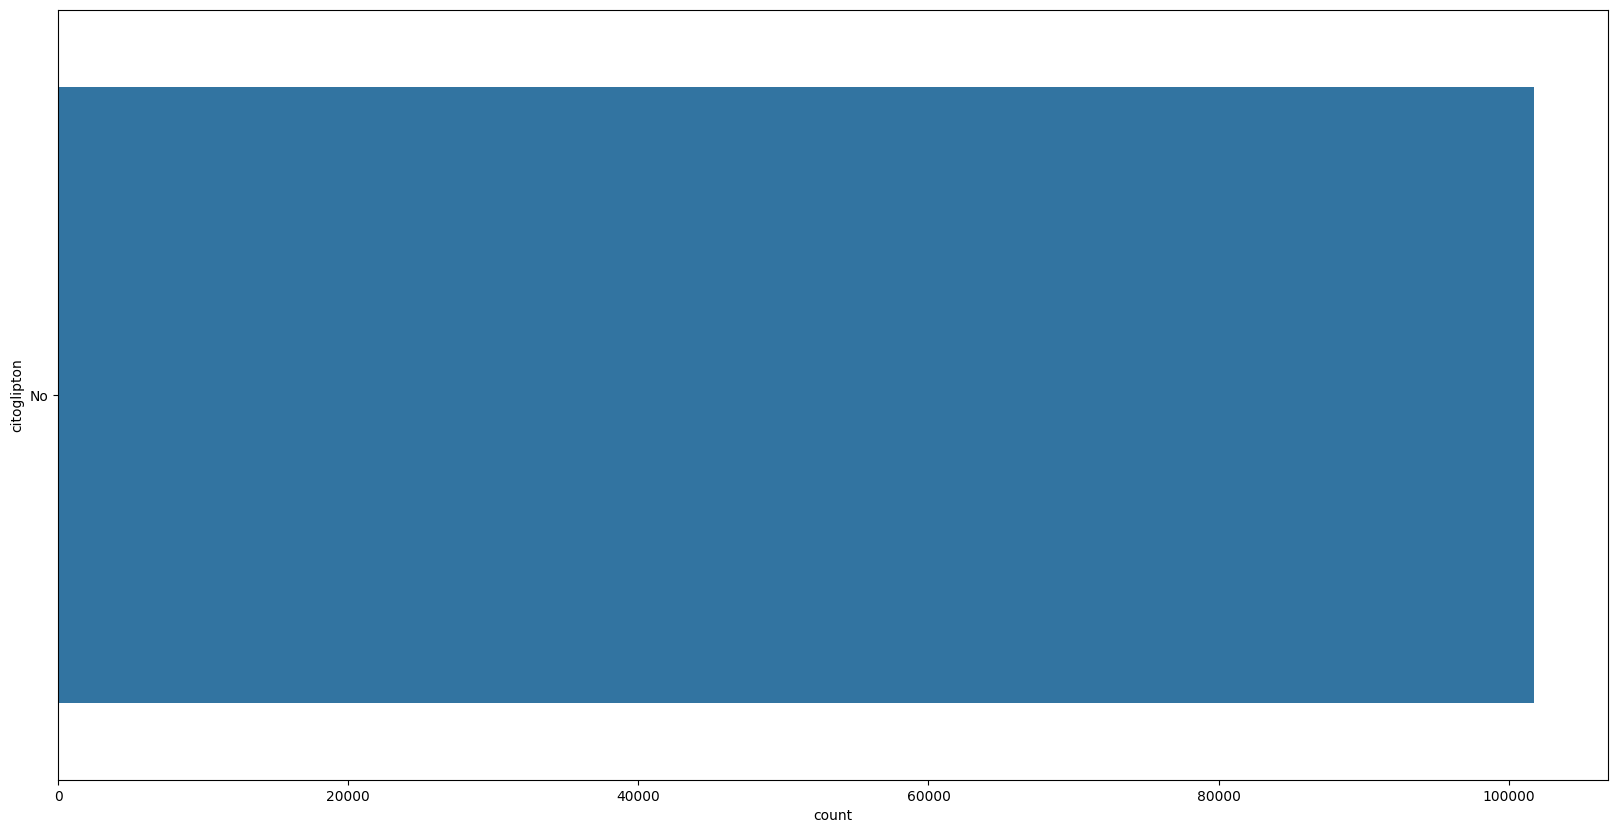

In [10]:
_ = sns.countplot(y = 'citoglipton', data = df)

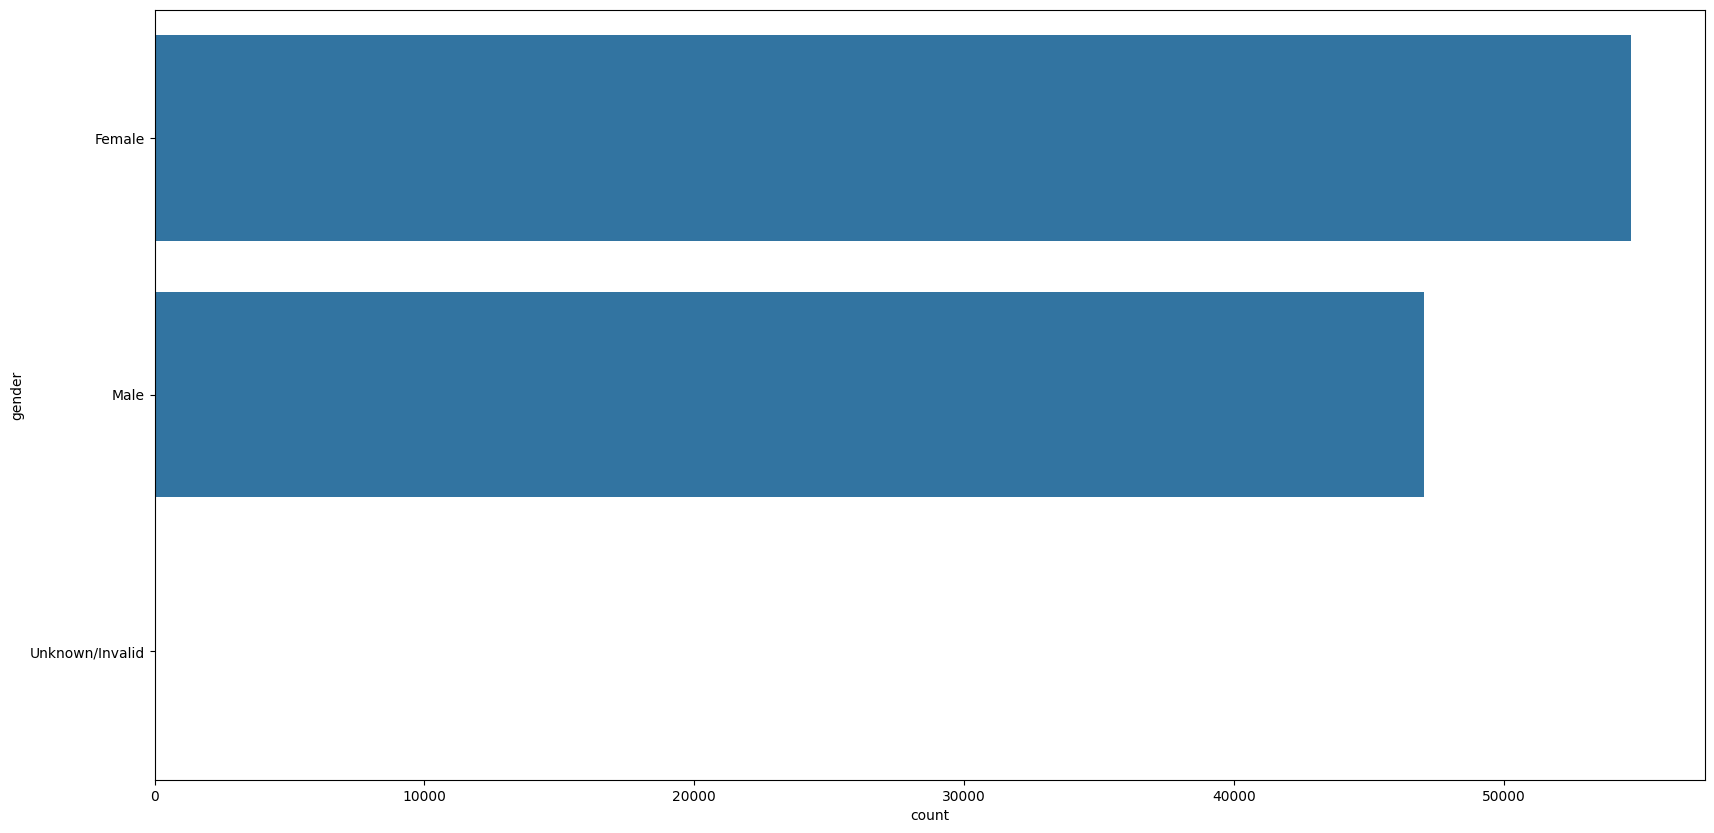

In [11]:
_ = sns.countplot(y = 'gender', data = df, order = df.gender.value_counts().index)

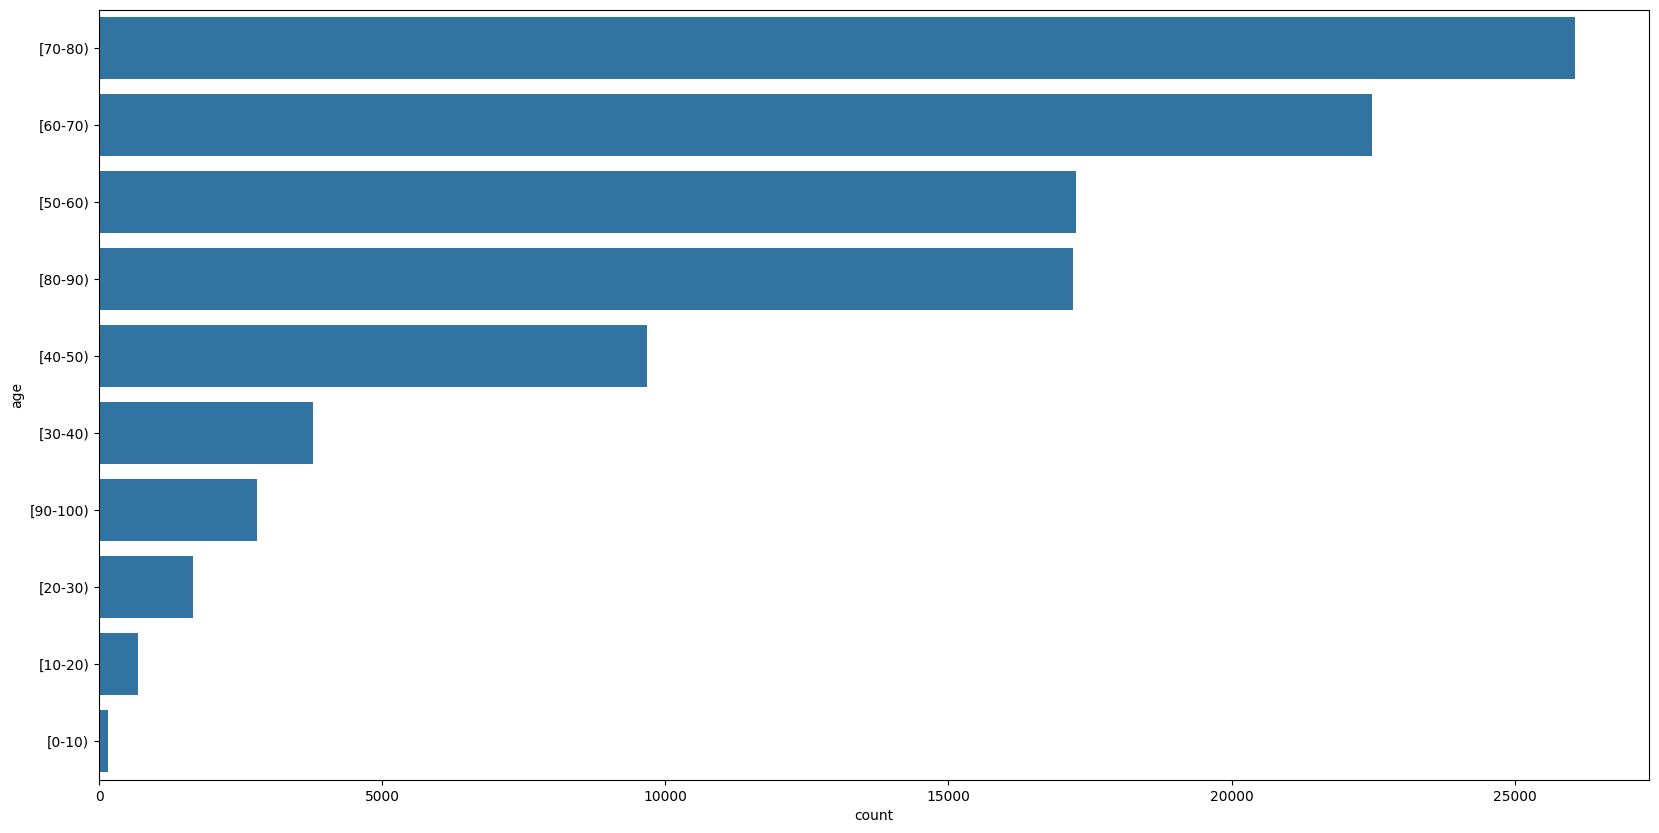

In [12]:
_ = sns.countplot(y = 'age', data = df, order = df.age.value_counts().index)

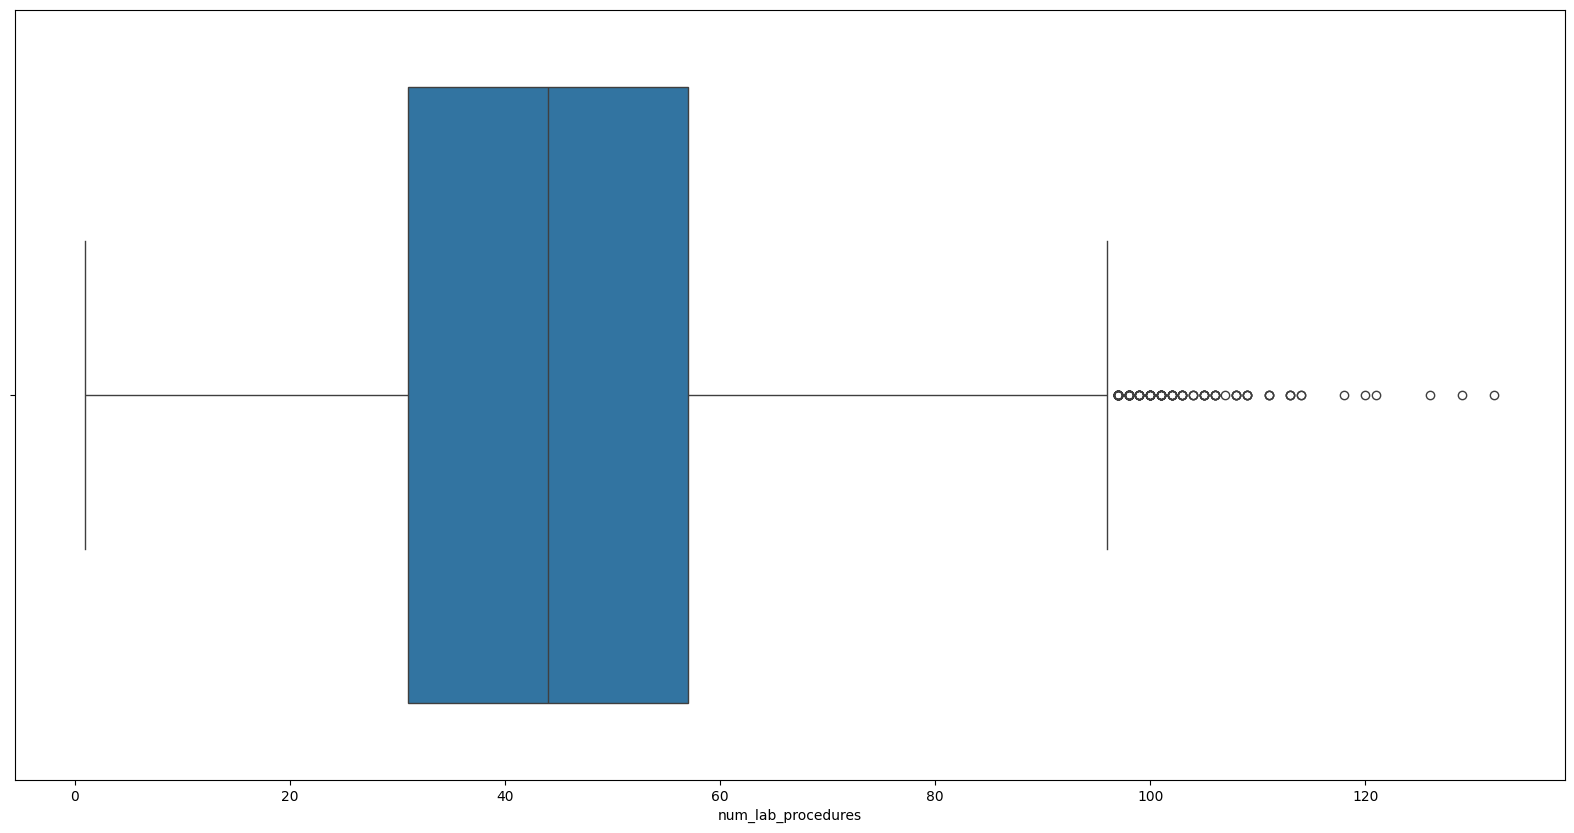

In [13]:
_ = sns.boxplot(x='num_lab_procedures', data = df)

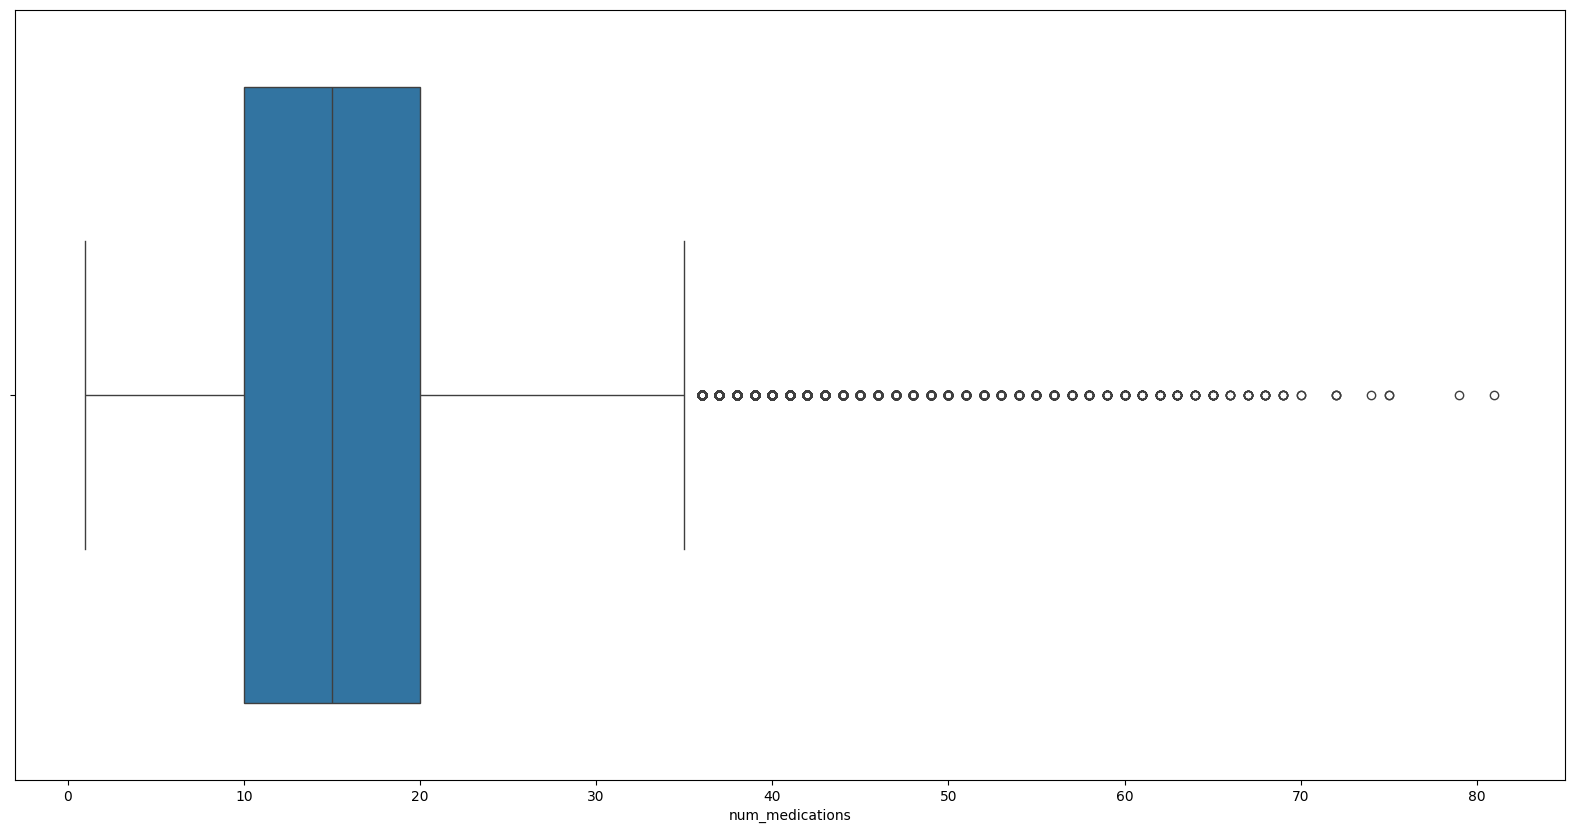

In [14]:
_ = sns.boxplot(x='num_medications', data = df)

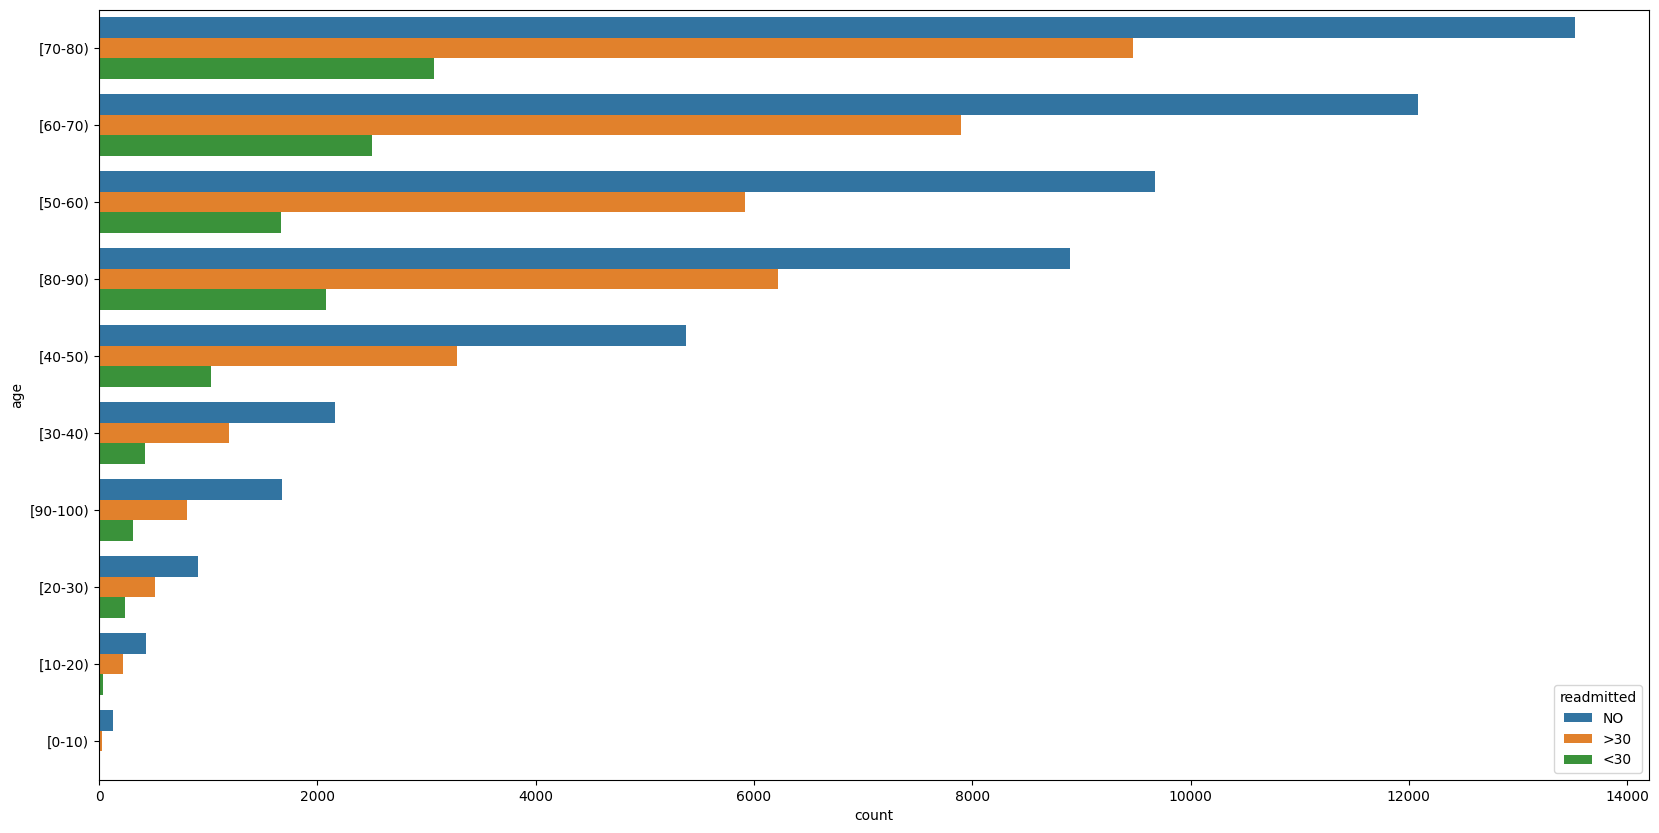

In [15]:
_ = sns.countplot(y = 'age', hue = 'readmitted', data = df, order = df.age.value_counts().index, hue_order = df.readmitted.value_counts().index)

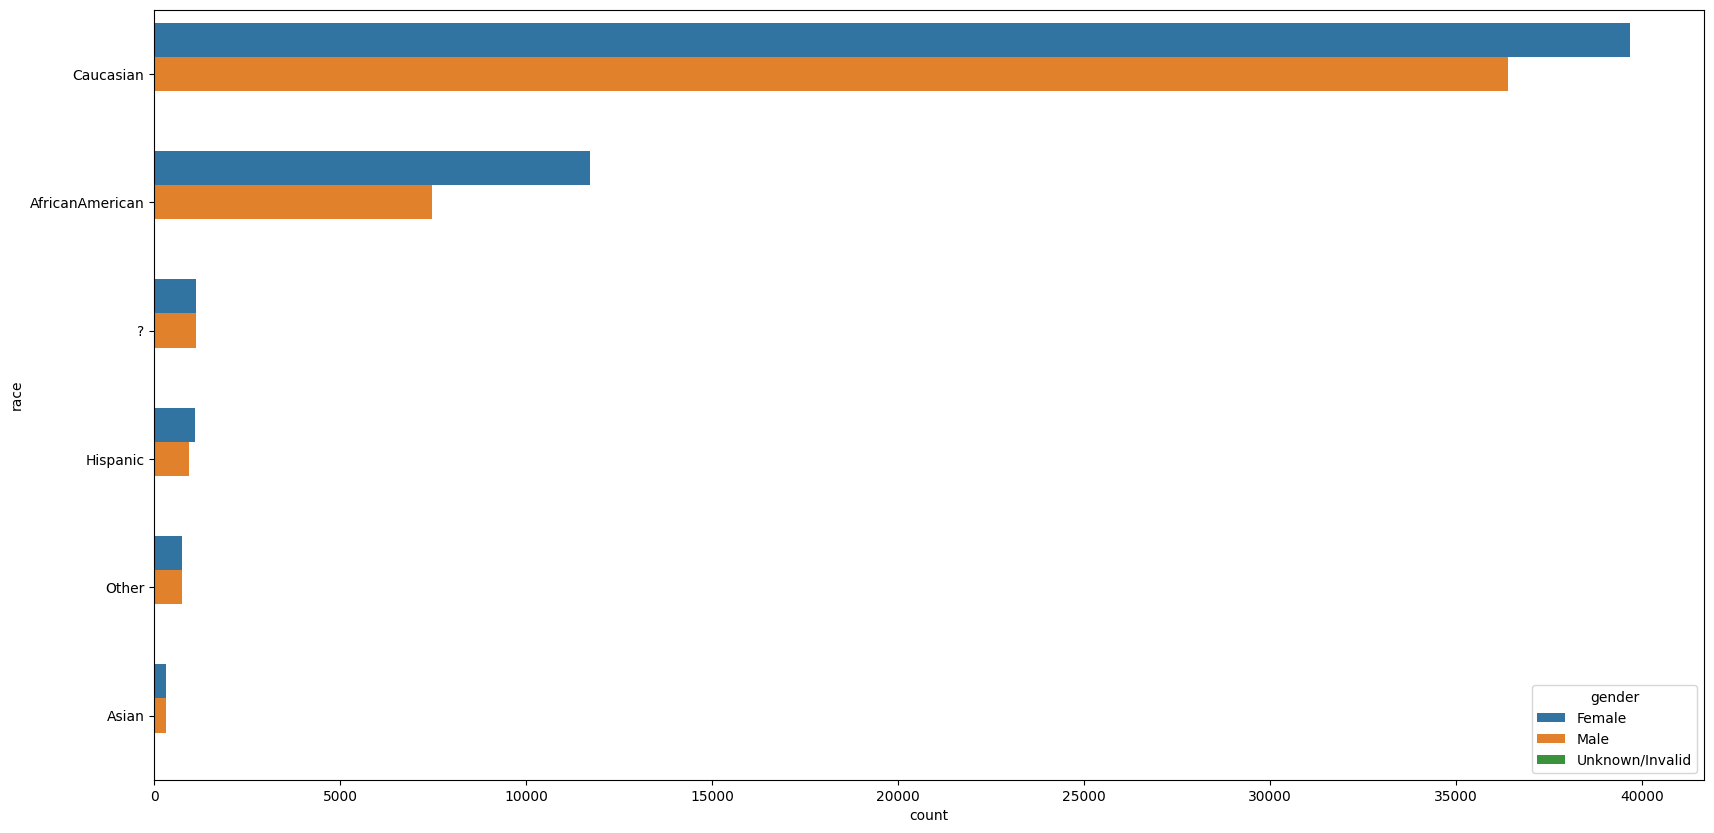

In [16]:
_ = sns.countplot(y = 'race', hue = 'gender', data = df, order = df.race.value_counts().index, hue_order = df.gender.value_counts().index)

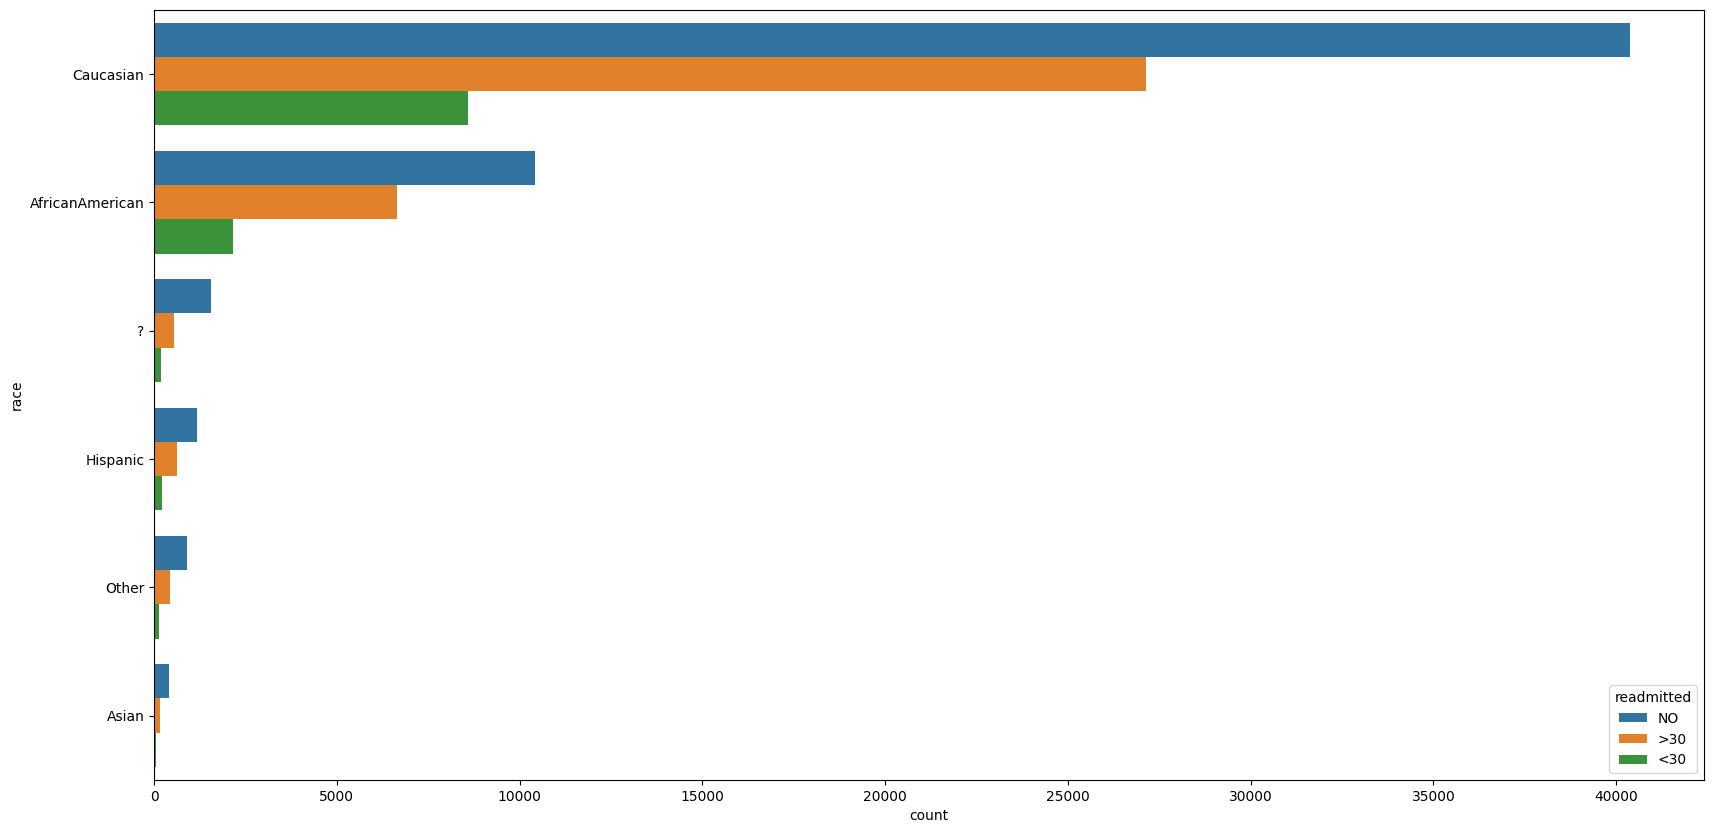

In [17]:
_ = sns.countplot(y = 'race', hue = 'readmitted', data = df, order = df.race.value_counts().index, hue_order = df.readmitted.value_counts().index)

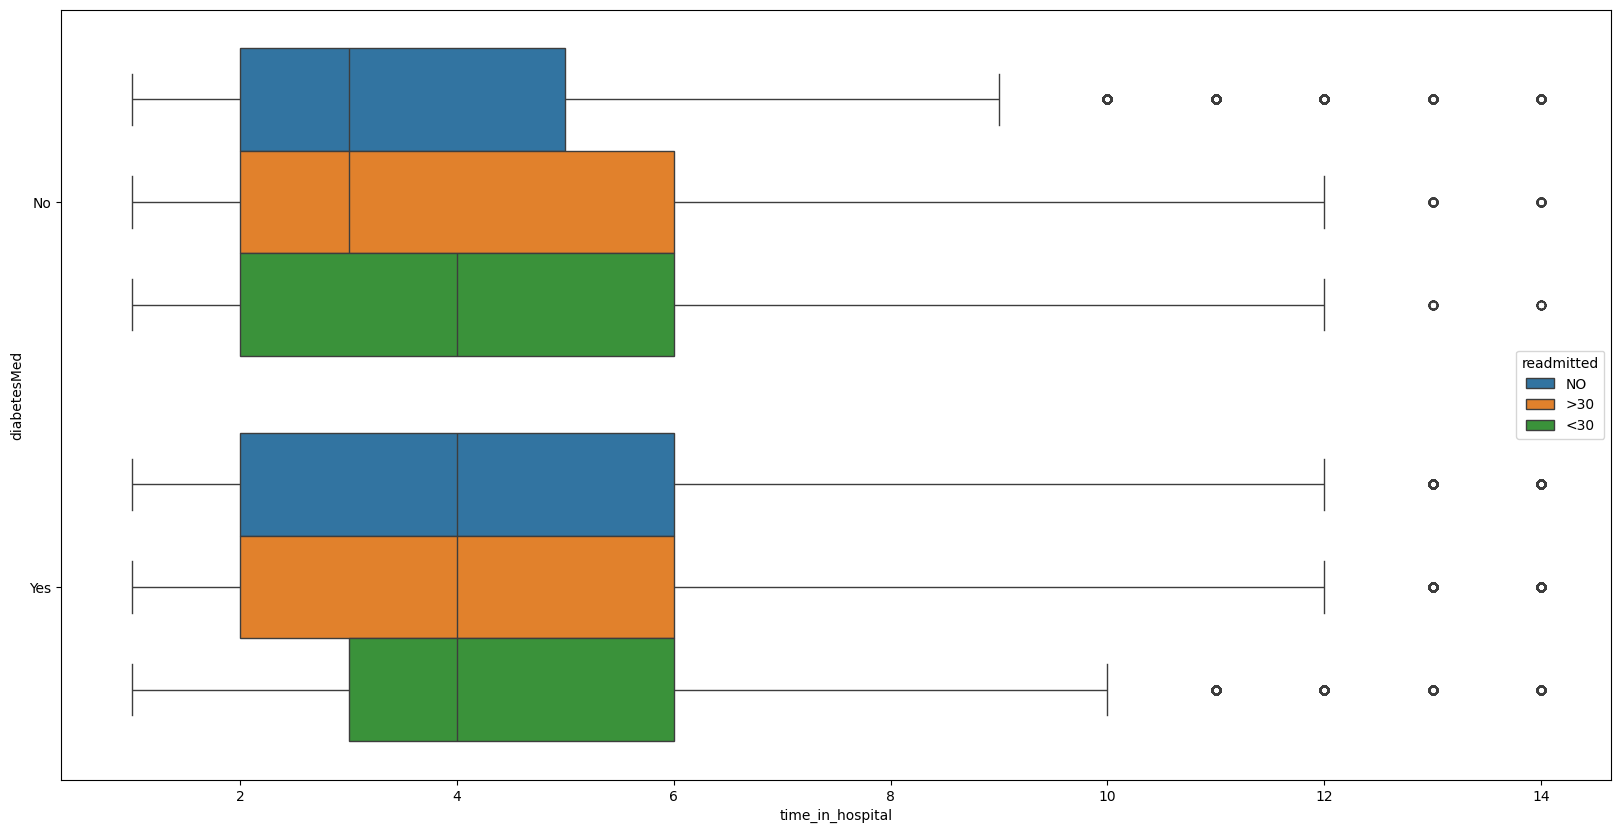

In [18]:
_ = sns.boxplot(x='time_in_hospital', y= 'diabetesMed', hue = 'readmitted', data = df)

# DATA PREPROCESSING

## DATA CLEANING 

In [19]:
#the aim of the model is to predict whether a patient will be readmitted or not
#therefore i only need two categories 'YES' and 'NO'

In [20]:
df.readmitted = df.readmitted.str.replace(pat = '<30', repl = 'YES')
df.readmitted = df.readmitted.str.replace(pat = '>30', repl = 'YES')

In [21]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [22]:
df.columns = df.columns.str.replace(pat = '-', repl = '_')

In [23]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(pat = '[', repl = '_')
        df[col] = df[col].str.replace(pat = ')', repl = '_')
        df[col] = df[col].str.replace(pat = '-', repl = '_')

In [24]:
# Dropping id columns 
df.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

In [25]:
#checking for missing values 
df.isnull().sum()

race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [26]:
# missing values in the data are represented by '?'
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide_metformin 0
glipizide_metformin 0
glimepiride_pioglitazone 0
metformin_rosiglitazone 0
metformin_pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [27]:
# dropped weight because it has too many missing data so it doesnt represent the data well
#96.9% of weight data missing, 
#49.1% of medical specialty missing has 73 different categories

In [28]:
df = df.drop(['medical_specialty', 'weight'], axis = 1)

In [29]:
df.payer_code = df.payer_code.str.replace(pat = '?', repl = 'Unknown')

In [30]:
set(df[((df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?'))].index)

{87181}

In [31]:
df = df.drop(df.index[[87181]])

In [32]:
set(df[(df.gender == 'Unknown/Invalid')].index)

{30506, 75551, 82573}

In [33]:
df = df.drop(df.index[[30506, 75551, 82573]])

In [34]:
#discharge_disposition_id 11 = 'deceased person'
df_drop = list(set(df[df['discharge_disposition_id'] == 11].index))

In [35]:
df = df.drop(df_drop)

In [36]:
df.examide.value_counts()

examide
No    100120
Name: count, dtype: int64

In [37]:
df.citoglipton.value_counts()

citoglipton
No    100120
Name: count, dtype: int64

In [38]:
#the columns for examide and citoglipton have the same value for all the records, (NO), therefore if a different value (Yex) is given the algorithm wouldnt be able to properly classify it.
#it is best to drop these two columns

In [39]:
df.drop(['examide', 'citoglipton'], axis = 1, inplace = True)

In [40]:
#all id mappings having the value null, not available. not mapped, etc. all provide the same information and should be put in one class

In [41]:
df['admission_type_id'] = df['admission_type_id'].replace(6 , 5)
df['admission_type_id'] = df['admission_type_id'].replace(8 , 5)

In [42]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25 , 18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26 , 18)

In [43]:
df['admission_source_id'] = df['admission_source_id'].replace(15 , 9)
df['admission_source_id'] = df['admission_source_id'].replace(17 , 9)
df['admission_source_id'] = df['admission_source_id'].replace(20 , 9)
df['admission_source_id'] = df['admission_source_id'].replace(21 , 9)

In [44]:
df.shape

(100120, 44)

## HANDLING MISSING DATA

In [45]:
df = df.replace('?', np.nan)

In [46]:
df.isnull().sum()

race                         2237
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         20
diag_2                        357
diag_3                       1420
number_diagnoses                0
max_glu_serum               94895
A1Cresult                   83243
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [47]:
df.race.mode()[0]

'Caucasian'

In [48]:
df.race.fillna(value = 'Unknown', inplace = True)

### DEALING WITH DIAGNOSIS USING 1CD9

In [49]:
df.diag_1.value_counts()

diag_1
428       6736
414       6554
786       4016
410       3478
486       3413
427       2729
491       2252
715       2147
682       2030
780       2012
434       1958
996       1944
276       1862
250.8     1667
599       1581
38        1522
584       1482
V57       1204
250.6     1178
820       1075
493       1054
577       1048
435       1015
518        986
562        985
574        961
296        895
560        866
250.7      861
250.13     849
          ... 
791          1
906          1
671          1
640          1
365          1
982          1
839          1
375          1
373          1
363          1
412          1
207          1
637          1
803          1
V25          1
842          1
217          1
988          1
389          1
347          1
915          1
827          1
57           1
160          1
314          1
817          1
61           1
148          1
870          1
V51          1
Name: count, Length: 715, dtype: int64

In [50]:
#diag_1, diag_2, diag_3 use icd-9 codes ICD(International Classification of Diseases)

In [51]:
diagnosis_df = pd.DataFrame([[0, 'null values', 'Unknown'],
                             [1, '249_250_253.5_588.1', 'diabetes'],
                             [2, '1_139', 'Infectious And Parasitic Diseases'],
                             [3, '140_239', 'Neoplasms'],
                             [4, '240_279', 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'],
                             [5, '280_289', 'Diseases Of The Blood And Blood-Forming Organs'],
                             [6, '290_319', 'Mental Disorders'],
                             [7, '320_389', 'Diseases Of The Nervous System And Sense Organs'],
                             [8, '390_459', 'Diseases Of The Circulatory System'],
                             [9, '460_519', 'Diseases Of The Respiratory System'],
                             [10, '520_579', 'Diseases Of The Digestive System'],
                             [11, '580_629', 'Diseases Of The Genitourinary System'],
                             [12, '630_679', 'Complications Of Pregnancy Childbirth And The Puerperium'],
                             [13, '680_709', 'Diseases Of The Skin And Subcutaneous Tissue'],
                             [14, '710_739', 'Diseases Of The Musculoskeletal System And Connective Tissue'],
                             [15, '740_759', 'Congenital Anomalies'],
                             [16, '760_779', 'Certain Conditions Originating In The Perinatal Period'],
                             [17, '780_799', 'Symptoms, Signs And Ill_Defined Conditions'],
                             [18, '800_999', 'Injury And Poisoning'],
                             [19, 'V01_V91', 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'],
                             [20, 'E000_E999', 'Supplementary Classification Of External Causes Of Injury And Poisoning']],
                            columns = ['diagnosis_type', 'diagnosis_code', 'diagnosis_desc'])

In [52]:
diagnosis_df

,diagnosis_type,diagnosis_code,diagnosis_desc
0,0,null values,Unknown
1,1,249_250_253.5_588.1,diabetes
2,2,1_139,Infectious And Parasitic Diseases
3,3,140_239,Neoplasms
4,4,240_279,"Endocrine, Nutritional And Metabolic Diseases,..."
5,5,280_289,Diseases Of The Blood And Blood-Forming Organs
6,6,290_319,Mental Disorders
7,7,320_389,Diseases Of The Nervous System And Sense Organs
8,8,390_459,Diseases Of The Circulatory System
9,9,460_519,Diseases Of The Respiratory System


In [53]:
df.diag_1.fillna(value = '0', inplace = True)
df.diag_2.fillna(value = '0', inplace = True)
df.diag_3.fillna(value = '0', inplace = True)

In [54]:
diag_1_V = list(df[df['diag_1'].str.contains('V')][['diag_1']].index)
diag_2_V = list(df[df['diag_2'].str.contains('V')][['diag_2']].index)
diag_3_V = list(df[df['diag_3'].str.contains('V')][['diag_3']].index)
df.loc[diag_1_V, 'diag_1'] = '1900'
df.loc[diag_2_V, 'diag_2'] = '1900'
df.loc[diag_3_V, 'diag_3'] = '1900'

In [55]:
diag_1_E = list(df[df['diag_1'].str.contains('E')][['diag_1']].index)
diag_2_E = list(df[df['diag_2'].str.contains('E')][['diag_2']].index)
diag_3_E = list(df[df['diag_3'].str.contains('E')][['diag_3']].index)
df.loc[diag_1_E, 'diag_1'] = '2000'
df.loc[diag_2_E, 'diag_2'] = '2000'
df.loc[diag_3_E, 'diag_3'] = '2000'

In [56]:
df['diag_1'] = df['diag_1'].apply(float)
df['diag_2'] = df['diag_2'].apply(float)
df['diag_3'] = df['diag_3'].apply(float)

In [57]:
diag_1_2 = list(set(df[((df['diag_1'] >= 1) & (df['diag_1'] < 140))].index))
diag_2_2 = list(set(df[((df['diag_2'] >= 1) & (df['diag_2'] < 140))].index))
diag_3_2 = list(set(df[((df['diag_3'] >= 1) & (df['diag_3'] < 140))].index))
df.loc[diag_1_2, 'diag_1'] = 2
df.loc[diag_2_2, 'diag_2'] = 2
df.loc[diag_3_2, 'diag_3'] = 2

In [58]:
diag_1_1 = list(set(df[((df['diag_1'] >=249 ) & (df['diag_1'] < 251))].index))
diag_2_1 = list(set(df[((df['diag_2'] >=249 ) & (df['diag_2'] < 251))].index))
diag_3_1 = list(set(df[((df['diag_3'] >=249 ) & (df['diag_3'] < 251))].index))
df.loc[diag_1_1, 'diag_1'] = 1
df.loc[diag_2_1, 'diag_2'] = 1
df.loc[diag_3_1, 'diag_3'] = 1

In [59]:
diag_1_3 = list(set(df[((df['diag_1'] >= 140) & (df['diag_1'] < 240))].index))
diag_2_3 = list(set(df[((df['diag_2'] >= 140) & (df['diag_2'] < 240))].index))
diag_3_3 = list(set(df[((df['diag_3'] >= 140) & (df['diag_3'] < 240))].index))
df.loc[diag_1_3, 'diag_1'] = 3
df.loc[diag_2_3, 'diag_2'] = 3
df.loc[diag_3_3, 'diag_3'] = 3

In [60]:
diag_1_4 = list(set(df[((df['diag_1'] >= 240) & (df['diag_1'] < 280))].index))
diag_2_4 = list(set(df[((df['diag_2'] >= 240) & (df['diag_2'] < 280))].index))
diag_3_4 = list(set(df[((df['diag_3'] >= 240) & (df['diag_3'] < 280))].index))
df.loc[diag_1_4, 'diag_1'] = 4
df.loc[diag_2_4, 'diag_2'] = 4
df.loc[diag_3_4, 'diag_3'] = 4

In [61]:
diag_1_5 = list(set(df[((df['diag_1'] >= 280) & (df['diag_1'] < 290))].index))
diag_2_5 = list(set(df[((df['diag_2'] >= 280) & (df['diag_2'] < 290))].index))
diag_3_5 = list(set(df[((df['diag_3'] >= 280) & (df['diag_3'] < 290))].index))
df.loc[diag_1_5, 'diag_1'] = 5
df.loc[diag_2_5, 'diag_2'] = 5
df.loc[diag_3_5, 'diag_3'] = 5

In [62]:
diag_1_6 = list(set(df[((df['diag_1'] >= 290) & (df['diag_1'] < 320))].index))
diag_2_6 = list(set(df[((df['diag_2'] >= 290) & (df['diag_2'] < 320))].index))
diag_3_6 = list(set(df[((df['diag_3'] >= 290) & (df['diag_3'] < 320))].index))
df.loc[diag_1_6, 'diag_1'] = 6
df.loc[diag_2_6, 'diag_2'] = 6
df.loc[diag_3_6, 'diag_3'] = 6

In [63]:
diag_1_7 = list(set(df[((df['diag_1'] >= 320) & (df['diag_1'] < 390))].index))
diag_2_7 = list(set(df[((df['diag_2'] >= 320) & (df['diag_2'] < 390))].index))
diag_3_7 = list(set(df[((df['diag_3'] >= 320) & (df['diag_3'] < 390))].index))
df.loc[diag_1_7, 'diag_1'] = 7
df.loc[diag_2_7, 'diag_2'] = 7
df.loc[diag_3_7, 'diag_3'] = 7

In [64]:
diag_1_8 = list(set(df[((df['diag_1'] >= 390) & (df['diag_1'] < 460))].index))
diag_2_8 = list(set(df[((df['diag_2'] >= 390) & (df['diag_2'] < 460))].index))
diag_3_8 = list(set(df[((df['diag_3'] >= 390) & (df['diag_3'] < 460))].index))
df.loc[diag_1_8, 'diag_1'] = 8
df.loc[diag_2_8, 'diag_2'] = 8
df.loc[diag_3_8, 'diag_3'] = 8

In [65]:
diag_1_9 = list(set(df[((df['diag_1'] >= 460) & (df['diag_1'] < 520))].index))
diag_2_9 = list(set(df[((df['diag_2'] >= 460) & (df['diag_2'] < 520))].index))
diag_3_9 = list(set(df[((df['diag_3'] >= 460) & (df['diag_3'] < 520))].index))
df.loc[diag_1_9, 'diag_1'] = 9
df.loc[diag_2_9, 'diag_2'] = 9
df.loc[diag_3_9, 'diag_3'] = 9

In [66]:
diag_1_10 = list(set(df[((df['diag_1'] >= 520) & (df['diag_1'] < 580))].index))
diag_2_10 = list(set(df[((df['diag_2'] >= 520) & (df['diag_2'] < 580))].index))
diag_3_10 = list(set(df[((df['diag_3'] >= 520) & (df['diag_3'] < 580))].index))
df.loc[diag_1_10, 'diag_1'] = 10
df.loc[diag_2_10, 'diag_2'] = 10
df.loc[diag_3_10, 'diag_3'] = 10

In [67]:
diag_1_11 = list(set(df[((df['diag_1'] >= 580) & (df['diag_1'] < 630))].index))
diag_2_11 = list(set(df[((df['diag_2'] >= 580) & (df['diag_2'] < 630))].index))
diag_3_11 = list(set(df[((df['diag_3'] >= 580) & (df['diag_3'] < 630))].index))
df.loc[diag_1_11, 'diag_1'] = 11
df.loc[diag_2_11, 'diag_2'] = 11
df.loc[diag_3_11, 'diag_3'] = 11

In [68]:
diag_1_12 = list(set(df[((df['diag_1'] >= 630) & (df['diag_1'] < 680))].index))
diag_2_12 = list(set(df[((df['diag_2'] >= 630) & (df['diag_2'] < 680))].index))
diag_3_12 = list(set(df[((df['diag_3'] >= 630) & (df['diag_3'] < 680))].index))
df.loc[diag_1_12, 'diag_1'] = 12
df.loc[diag_2_12, 'diag_2'] = 12
df.loc[diag_3_12, 'diag_3'] = 12

In [69]:
diag_1_13 = list(set(df[((df['diag_1'] >= 680) & (df['diag_1'] < 710))].index))
diag_2_13 = list(set(df[((df['diag_2'] >= 680) & (df['diag_2'] < 710))].index))
diag_3_13 = list(set(df[((df['diag_3'] >= 680) & (df['diag_3'] < 710))].index))
df.loc[diag_1_13, 'diag_1'] = 13
df.loc[diag_2_13, 'diag_2'] = 13
df.loc[diag_3_13, 'diag_3'] = 13

In [70]:
diag_1_14 = list(set(df[((df['diag_1'] >= 710) & (df['diag_1'] < 740))].index))
diag_2_14 = list(set(df[((df['diag_2'] >= 710) & (df['diag_2'] < 740))].index))
diag_3_14 = list(set(df[((df['diag_3'] >= 710) & (df['diag_3'] < 740))].index))
df.loc[diag_1_14, 'diag_1'] = 14
df.loc[diag_2_14, 'diag_2'] = 14
df.loc[diag_3_14, 'diag_3'] = 14

In [71]:
diag_1_15 = list(set(df[((df['diag_1'] >= 740) & (df['diag_1'] < 760))].index))
diag_2_15 = list(set(df[((df['diag_2'] >= 740) & (df['diag_2'] < 760))].index))
diag_3_15 = list(set(df[((df['diag_3'] >= 740) & (df['diag_3'] < 760))].index))
df.loc[diag_1_15, 'diag_1'] = 15
df.loc[diag_2_15, 'diag_2'] = 15
df.loc[diag_3_15, 'diag_3'] = 15

In [72]:
diag_1_16 = list(set(df[((df['diag_1'] >= 760) & (df['diag_1'] < 780))].index))
diag_2_16 = list(set(df[((df['diag_2'] >= 760) & (df['diag_2'] < 780))].index))
diag_3_16 = list(set(df[((df['diag_3'] >= 760) & (df['diag_3'] < 780))].index))
df.loc[diag_1_16, 'diag_1'] = 16
df.loc[diag_2_16, 'diag_2'] = 16
df.loc[diag_3_16, 'diag_3'] = 16

In [73]:
diag_1_17 = list(set(df[((df['diag_1'] >= 780) & (df['diag_1'] < 800))].index))
diag_2_17 = list(set(df[((df['diag_2'] >= 780) & (df['diag_2'] < 800))].index))
diag_3_17 = list(set(df[((df['diag_3'] >= 780) & (df['diag_3'] < 800))].index))
df.loc[diag_1_17, 'diag_1'] = 17
df.loc[diag_2_17, 'diag_2'] = 17
df.loc[diag_3_17, 'diag_3'] = 17

In [74]:
diag_1_18 = list(set(df[((df['diag_1'] >= 800) & (df['diag_1'] < 1000))].index))
diag_2_18 = list(set(df[((df['diag_2'] >= 800) & (df['diag_2'] < 1000))].index))
diag_3_18 = list(set(df[((df['diag_3'] >= 800) & (df['diag_3'] < 1000))].index))
df.loc[diag_1_18, 'diag_1'] = 18
df.loc[diag_2_18, 'diag_2'] = 18
df.loc[diag_3_18, 'diag_3'] = 18

In [75]:
df.loc[diag_1_V, 'diag_1'] = 19
df.loc[diag_2_V, 'diag_2'] = 19
df.loc[diag_3_V, 'diag_3'] = 19
df.loc[diag_1_E, 'diag_1'] = 20
df.loc[diag_2_E, 'diag_2'] = 20
df.loc[diag_3_E, 'diag_3'] = 20

In [76]:
df.diag_1.value_counts()

diag_1
8.0     29784
9.0     10059
10.0     9116
1.0      8693
17.0     7618
18.0     6882
11.0     5015
14.0     4944
3.0      3299
4.0      2669
2.0      2586
13.0     2513
6.0      2259
19.0     1638
7.0      1192
5.0      1095
12.0      687
15.0       50
0.0        20
20.0        1
Name: count, dtype: int64

# OUTLIERS

In [77]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
count,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000,100120.000000
mean,1.966810,3.526808,5.190022,4.389453,42.943787,1.330803,15.981552,0.369427,0.198342,0.632821,9.312245,8.022563,7.718218,7.409339
std,1.280436,4.996876,2.866514,2.974528,19.620228,1.700335,8.092612,1.263973,0.935517,1.261825,4.837266,4.615008,5.107373,1.938211
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,8.000000,4.000000,4.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000
75%,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,11.000000,10.000000,10.000000,9.000000
max,7.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,20.000000,20.000000,20.000000,16.000000


In [78]:
#time_in_hospital!	num_lab_procedures!	num_procedures!	num_medications!	number_outpatient	number_emergency	number_inpatient	number_diagnoses!

In [79]:
Q1 = df.time_in_hospital.quantile(0.25)
Q3 = df.time_in_hospital.quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(2.0, 6.0, 4.0)

In [80]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(-4.0, 12.0)

In [81]:
df = df[(df.time_in_hospital>lower_limit)&(df.time_in_hospital<upper_limit)]

In [82]:
Q1 = df.num_lab_procedures.quantile(0.25)
Q3 = df.num_lab_procedures.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

Q1, Q3, IQR, lower_limit, upper_limit

(31.0, 56.0, 25.0, -6.5, 93.5)

In [83]:
df = df[(df.num_lab_procedures>lower_limit)&(df.num_lab_procedures<upper_limit)]

In [84]:
Q1 = df.num_procedures.quantile(0.25)
Q3 = df.num_procedures.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

Q1, Q3, IQR, lower_limit, upper_limit

(0.0, 2.0, 2.0, -3.0, 5.0)

In [85]:
df = df[(df.num_procedures>lower_limit)&(df.num_procedures<upper_limit)]

In [86]:
Q1 = df.num_medications.quantile(0.25)
Q3 = df.num_medications.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

Q1, Q3, IQR, lower_limit, upper_limit

(10.0, 19.0, 9.0, -3.5, 32.5)

In [87]:
df = df[(df.num_medications>lower_limit)&(df.num_medications<upper_limit)]

In [88]:
Q1 = df.number_diagnoses.quantile(0.25)
Q3 = df.number_diagnoses.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

Q1, Q3, IQR, lower_limit, upper_limit

(6.0, 9.0, 3.0, 1.5, 13.5)

In [89]:
df = df[(df.number_diagnoses>lower_limit)&(df.number_diagnoses<upper_limit)]

In [90]:
Q1 = df.number_outpatient.quantile(0.25)
Q3 = df.number_outpatient.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

Q1, Q3, IQR, lower_limit, upper_limit

(0.0, 0.0, 0.0, 0.0, 0.0)

In [91]:
min_threshold, max_threshold = df.number_outpatient.quantile([0.001,0.999])
min_threshold, max_threshold

(0.0, 14.0)

In [92]:
df = df[(df.number_outpatient<max_threshold)]

In [93]:
min_threshold, max_threshold = df.number_inpatient.quantile([0.001,0.999])
min_threshold, max_threshold

(0.0, 11.0)

In [94]:
df = df[(df.number_inpatient<max_threshold)]

In [95]:
min_threshold, max_threshold = df.number_emergency.quantile([0.001,0.999])
min_threshold, max_threshold

(0.0, 10.0)

In [96]:
df = df[(df.number_emergency<max_threshold)]

In [97]:
df.shape

(86763, 44)

# DUMMY CODING

In [98]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(str)
df['admission_source_id'] = df['admission_source_id'].apply(str)
df['admission_type_id'] = df['admission_type_id'].apply(str)
df['diag_1'] = df['diag_1'].apply(int)
df['diag_2'] = df['diag_2'].apply(int)
df['diag_3'] = df['diag_3'].apply(int)

df['diag_1'] = df['diag_1'].apply(str)
df['diag_2'] = df['diag_2'].apply(str)
df['diag_3'] = df['diag_3'].apply(str)

In [99]:
# dummy coding
#  readmitted,age!, change!, diabetesMed!,max_glu_serum!, A1Cresult! gender!, race!, , metformin!, repaglinide!, nateglinide!, chlorpropamide!, 
# glimepiride!, acetohexamide!, glipizide!, glyburide!, tolbutamide!, pioglitazone!, rosiglitazone!, acarbose!, miglitol!, troglitazone!,
#tolazamide!, examide!, citoglipton!, insulin!, glyburide_metformin!, glipizide_metformin!, glimepiride_pioglitazone!, metformin_rosiglitazone!, metformin_pioglitazone!

In [100]:
gender_dummy = pd.get_dummies(df.gender, drop_first = True)
gender_dummy.columns = ['gender_' + col for col in gender_dummy.columns]
gender_dummy.head(2)

,gender_Male
1,False
3,True


In [101]:
payer_code_dummy = pd.get_dummies(df.payer_code, drop_first = True)
payer_code_dummy.columns = ['payer_code_' + col for col in payer_code_dummy.columns]
payer_code_dummy.head(2)

,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_Unknown,payer_code_WC
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [102]:
race_dummy = pd.get_dummies(df.race, drop_first = True)
race_dummy.columns = ['race_' + col for col in race_dummy.columns]

age_dummy = pd.get_dummies(df.age, drop_first = True)
age_dummy.columns = ['age_' + col for col in age_dummy.columns]

change_dummy = pd.get_dummies(df.change, drop_first = True)
change_dummy.columns = ['change_' + col for col in change_dummy.columns]

diabetesMed_dummy = pd.get_dummies(df.diabetesMed, drop_first = True)
diabetesMed_dummy.columns = ['diabetesMed_' + col for col in diabetesMed_dummy.columns]

A1Cresult_dummy = pd.get_dummies(df.A1Cresult, drop_first = True)
A1Cresult_dummy.columns = ['A1Cresult_' + col for col in A1Cresult_dummy.columns]

max_glu_serum_dummy = pd.get_dummies(df.max_glu_serum, drop_first = True)
max_glu_serum_dummy.columns = ['max_glu_serum_' + col for col in max_glu_serum_dummy.columns]

diag_1_dummy = pd.get_dummies(df.diag_1, drop_first = True)
diag_1_dummy.columns = ['diag_1_diagnosis_' + col for col in diag_1_dummy.columns]

diag_2_dummy = pd.get_dummies(df.diag_2, drop_first = True)
diag_2_dummy.columns = ['diag_2_diagnosis_' + col for col in diag_2_dummy.columns]

diag_3_dummy = pd.get_dummies(df.diag_3, drop_first = True)
diag_3_dummy.columns = ['diag_3_diagnosis_' + col for col in diag_3_dummy.columns]

admission_type_id_dummy = pd.get_dummies(df.admission_type_id, drop_first = True)
admission_type_id_dummy.columns = ['admission_type_id_' + col for col in admission_type_id_dummy.columns]

admission_source_id_dummy = pd.get_dummies(df.admission_source_id, drop_first = True)
admission_source_id_dummy.columns = ['admission_source_id_' + col for col in admission_source_id_dummy.columns]

discharge_disposition_id_dummy = pd.get_dummies(df.discharge_disposition_id, drop_first = True)
discharge_disposition_id_dummy.columns = ['discharge_disposition_id_' + col for col in discharge_disposition_id_dummy.columns]

In [103]:
metformin_dummy = pd.get_dummies(df.metformin, drop_first = True)
metformin_dummy.columns = ['metformin_' + col for col in metformin_dummy.columns]

repaglinide_dummy = pd.get_dummies(df.repaglinide, drop_first = True)
repaglinide_dummy.columns = ['repaglinide_' + col for col in repaglinide_dummy.columns]

nateglinide_dummy = pd.get_dummies(df.nateglinide, drop_first = True)
nateglinide_dummy.columns = ['nateglinide_' + col for col in nateglinide_dummy.columns]

chlorpropamide_dummy = pd.get_dummies(df.chlorpropamide, drop_first = True)
chlorpropamide_dummy.columns = ['chlorpropamide_' + col for col in chlorpropamide_dummy.columns]

glimepiride_dummy = pd.get_dummies(df.glimepiride, drop_first = True)
glimepiride_dummy.columns = ['glimepiride_' + col for col in glimepiride_dummy.columns]

acetohexamide_dummy = pd.get_dummies(df.acetohexamide, drop_first = True)
acetohexamide_dummy.columns = ['acetohexamide_' + col for col in acetohexamide_dummy.columns]

glipizide_dummy = pd.get_dummies(df.glipizide, drop_first = True)
glipizide_dummy.columns = ['glipizide_' + col for col in glipizide_dummy.columns]

glyburide_dummy = pd.get_dummies(df.glyburide, drop_first = True)
glyburide_dummy.columns = ['glyburide_' + col for col in glyburide_dummy.columns]

tolbutamide_dummy = pd.get_dummies(df.tolbutamide, drop_first = True)
tolbutamide_dummy.columns = ['tolbutamide_' + col for col in tolbutamide_dummy.columns]

pioglitazone_dummy = pd.get_dummies(df.pioglitazone, drop_first = True)
pioglitazone_dummy.columns = ['pioglitazone_' + col for col in pioglitazone_dummy.columns]

rosiglitazone_dummy = pd.get_dummies(df.rosiglitazone, drop_first = True)
rosiglitazone_dummy.columns = ['rosiglitazone_' + col for col in rosiglitazone_dummy.columns]

acarbose_dummy = pd.get_dummies(df.acarbose, drop_first = True)
acarbose_dummy.columns = ['acarbose_' + col for col in acarbose_dummy.columns]

miglitol_dummy = pd.get_dummies(df.miglitol, drop_first = True)
miglitol_dummy.columns = ['miglitol_' + col for col in miglitol_dummy.columns]

troglitazone_dummy = pd.get_dummies(df.troglitazone, drop_first = True)
troglitazone_dummy.columns = ['troglitazone_' + col for col in troglitazone_dummy.columns]

tolazamide_dummy = pd.get_dummies(df.tolazamide, drop_first = True)
tolazamide_dummy.columns = ['tolazamide_' + col for col in tolazamide_dummy.columns]

insulin_dummy = pd.get_dummies(df.insulin, drop_first = True)
insulin_dummy.columns = ['insulin_' + col for col in insulin_dummy.columns]

glyburide_metformin_dummy = pd.get_dummies(df.glyburide_metformin, drop_first = True)
glyburide_metformin_dummy.columns = ['glyburide_metformin_' + col for col in glyburide_metformin_dummy.columns]

glipizide_metformin_dummy = pd.get_dummies(df.glipizide_metformin, drop_first = True)
glipizide_metformin_dummy.columns = ['glipizide_metformin_' + col for col in glipizide_metformin_dummy.columns]

glimepiride_pioglitazone_dummy = pd.get_dummies(df.glimepiride_pioglitazone, drop_first = True)
glimepiride_pioglitazone_dummy.columns = ['glimepiride_pioglitazone_' + col for col in glimepiride_pioglitazone_dummy.columns]

metformin_rosiglitazone_dummy = pd.get_dummies(df.metformin_rosiglitazone, drop_first = True)
metformin_rosiglitazone_dummy.columns = ['metformin_rosiglitazone_' + col for col in metformin_rosiglitazone_dummy.columns]

metformin_pioglitazone_dummy = pd.get_dummies(df.metformin_pioglitazone, drop_first = True)
metformin_pioglitazone_dummy.columns = ['metformin_pioglitazone_' + col for col in metformin_pioglitazone_dummy.columns]

In [104]:
readmitted_dummy = pd.get_dummies(df.readmitted, drop_first = True)
readmitted_dummy.columns = ['readmitted_' + col for col in readmitted_dummy.columns]
readmitted_dummy.head(2)

,readmitted_YES
1,True
3,False


In [105]:
drug_dummy = pd.concat([ metformin_dummy, repaglinide_dummy, nateglinide_dummy, chlorpropamide_dummy,  glimepiride_dummy, acetohexamide_dummy, glipizide_dummy, glyburide_dummy, tolbutamide_dummy, pioglitazone_dummy, rosiglitazone_dummy, acarbose_dummy, miglitol_dummy, troglitazone_dummy,tolazamide_dummy, insulin_dummy, glyburide_metformin_dummy, glipizide_metformin_dummy, glimepiride_pioglitazone_dummy, metformin_rosiglitazone_dummy, metformin_pioglitazone_dummy],axis = 1)

In [106]:
df_dummy = pd.concat([df, drug_dummy, change_dummy, payer_code_dummy, age_dummy, diabetesMed_dummy, gender_dummy, race_dummy, max_glu_serum_dummy, A1Cresult_dummy, admission_type_id_dummy, admission_source_id_dummy, discharge_disposition_id_dummy, diag_1_dummy, diag_2_dummy, diag_3_dummy, readmitted_dummy], axis = 1)

In [107]:
df_dummy.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'metformin_No', 'metformin_Steady', 'metformin_Up', 'repaglinide_No',
       'repaglinide_Steady', 'repaglinide_Up', 'nateglinide_No',
       'nateglinide_Steady', 'nateglinide_Up', 'chlo

In [108]:
df_dummy.drop(['payer_code', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'race', 'gender', 'metformin', 'change', 'diabetesMed', 'max_glu_serum', 'A1Cresult', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 'metformin_rosiglitazone', 'metformin_pioglitazone', 'readmitted'], axis = 1, inplace = True)

In [109]:
df_dummy.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin_No,metformin_Steady,...,diag_3_diagnosis_2,diag_3_diagnosis_20,diag_3_diagnosis_3,diag_3_diagnosis_4,diag_3_diagnosis_5,diag_3_diagnosis_6,diag_3_diagnosis_7,diag_3_diagnosis_8,diag_3_diagnosis_9,readmitted_YES
1,3,59,0,18,0,0,0,9,True,False,...,False,False,False,True,False,False,False,False,False,True
3,2,44,1,16,0,0,0,7,True,False,...,False,False,False,False,False,False,False,True,False,False
4,1,51,0,8,0,0,0,5,True,False,...,False,False,False,False,False,False,False,False,False,False
6,4,70,1,21,0,0,0,7,False,True,...,False,False,False,False,False,False,False,False,False,False
7,5,73,0,12,0,0,0,8,True,False,...,False,False,False,False,False,False,False,False,False,True


# DATA NORMALIZATION 

In [110]:
# Importing library
from sklearn.preprocessing import MinMaxScaler

In [111]:
X = df_dummy.drop('readmitted_YES', axis = 1)
X.shape

(86763, 191)

In [112]:
y = df_dummy.readmitted_YES
y.shape

(86763,)

In [113]:
scaler  = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# MODEL TRAINING

In [114]:
# Importing Libraries 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [115]:
#Splitting data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

X_train.shape

(60734, 191)

In [116]:
y_train.shape

(60734,)

In [117]:
X_test.shape

(26029, 191)

In [118]:
y_test.shape

(26029,)

In [119]:
# DECISION TREE CLASSIFIER
dtree_clf = tree.DecisionTreeClassifier()
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)
print('Decision Tree Accuracy:', dtree_acc)

y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC Score:', roc_auc_score(y_test, y_pred_prob))

Decision Tree Accuracy: 0.5586461254754312
Decision Tree AUC Score: 0.5568542424463375


In [120]:
# RANDOM FOREST CLASSIFIER
rf_clf = ensemble.RandomForestClassifier()
_ = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy:', rf_acc)

y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

Random Forest Accuracy: 0.6356755926082447
Random Forest AUC Score: 0.6804090171387968


In [121]:
# GRADIENT BOOSTING CLASSIFIER 
gb_clf = ensemble.GradientBoostingClassifier()
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print('Gradient Boosting Accuracy:', gb_acc)

y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gradient Boosting AUC Score:', roc_auc_score(y_test, y_pred_prob))

Gradient Boosting Accuracy: 0.6323715855392062
Gradient Boosting AUC Score: 0.6835634801869894


In [122]:
# GAUSSIAN NAIVE BAYES 
NB_clf = naive_bayes.GaussianNB()
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)
print('Gaussian Naive Bayes Accuracy:', NB_acc)

y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('AUC_score', roc_auc_score(y_test, y_pred_prob))

Gaussian Naive Bayes Accuracy: 0.48161665834261785
AUC_score 0.5623447231762869


In [123]:
# EVALUATION METRICS
print('.....DECISION TREE CLASSIFICATION REPORT......')
print(classification_report(y_test, dtree_pred))

print('.....RANDOM FOREST CLASSIFICATION REPORT......')
print(classification_report(y_test, rf_pred))

print('.....GRADIENT BOOSTING CLASSIFICATION REPORT......')
print(classification_report(y_test, gb_pred))

print('.....GAUSSIAN NAIVE BAYES CLASSIFICATION REPORT......')
print(classification_report(y_test, NB_pred))

.....DECISION TREE CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.59      0.58      0.59     13936
        True       0.52      0.53      0.53     12093

    accuracy                           0.56     26029
   macro avg       0.56      0.56      0.56     26029
weighted avg       0.56      0.56      0.56     26029

.....RANDOM FOREST CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.64      0.71      0.68     13936
        True       0.62      0.55      0.58     12093

    accuracy                           0.64     26029
   macro avg       0.63      0.63      0.63     26029
weighted avg       0.63      0.64      0.63     26029

.....GRADIENT BOOSTING CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.63      0.74      0.68     13936
        True       0.63      0.51      0.56     12093

    accuracy                         

# FINETUNING MODEL

In [124]:
dtree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = 10, min_samples_split = 500, 
                                        class_weight = 'balanced', min_impurity_decrease = 0.0001)
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)

print('.....DECISION TREE FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....')
print(classification_report(y_test, dtree_pred))

print('Decision Tree Accuracy:', dtree_acc)

y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....DECISION TREE FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.64      0.67      0.65     13936
        True       0.60      0.57      0.59     12093

    accuracy                           0.62     26029
   macro avg       0.62      0.62      0.62     26029
weighted avg       0.62      0.62      0.62     26029

Decision Tree Accuracy: 0.622843751200584
Decision Tree AUC_Score: 0.6614013828724818


In [125]:
dtree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30, class_weight = 'balanced')
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)

print('.....DECISION TREE FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....')
print(classification_report(y_test, dtree_pred))

print('Decision Tree Accuracy:', dtree_acc)

y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....DECISION TREE FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.64      0.66      0.65     13936
        True       0.59      0.57      0.58     12093

    accuracy                           0.62     26029
   macro avg       0.61      0.61      0.61     26029
weighted avg       0.62      0.62      0.62     26029

Decision Tree Accuracy: 0.6160820623151101
Decision Tree AUC_Score: 0.6558650077048302


In [126]:
rf = ensemble.RandomForestClassifier(bootstrap = False, n_estimators = 1000, min_samples_split = 500, 
                                     class_weight = 'balanced', n_jobs = -1, criterion = 'entropy')
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print('.....RANDOM FOREST FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....')
print(classification_report(y_test, rf_pred))

print('Random Forest Accuracy:', rf_acc)

y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....RANDOM FOREST FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.66      0.65      0.66     13936
        True       0.61      0.61      0.61     12093

    accuracy                           0.64     26029
   macro avg       0.63      0.63      0.63     26029
weighted avg       0.64      0.64      0.64     26029

Random Forest Accuracy: 0.6360597794767375
Random Forest AUC_Score: 0.6872711122839327


In [127]:
rf = ensemble.RandomForestClassifier(criterion = 'entropy', bootstrap = False, n_estimators = 1000, 
                                     class_weight = 'balanced_subsample',min_impurity_decrease = 0.00001, n_jobs = -1)
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print('.....RANDOM FOREST FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....')
print(classification_report(y_test, rf_pred))

print('Random Forest Accuracy:', rf_acc)

y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....RANDOM FOREST FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.66      0.68      0.67     13936
        True       0.62      0.60      0.61     12093

    accuracy                           0.64     26029
   macro avg       0.64      0.64      0.64     26029
weighted avg       0.64      0.64      0.64     26029

Random Forest Accuracy: 0.6402089976564601
Random Forest AUC_Score: 0.6911277937545446


In [128]:
gb_clf = ensemble.GradientBoostingClassifier(min_samples_split = 100,  n_estimators = 1200, loss = 'exponential', random_state = 30,
                                             learning_rate = 0.1)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print('.....GRADIENT BOOSTING FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....')
print(classification_report(y_test, gb_pred))

print('Gradient Boosting Accuracy:', gb_acc)

y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....GRADIENT BOOSTING FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.65      0.71      0.68     13936
        True       0.63      0.56      0.59     12093

    accuracy                           0.64     26029
   macro avg       0.64      0.64      0.64     26029
weighted avg       0.64      0.64      0.64     26029

Gradient Boosting Accuracy: 0.6415536516961851
Gaussian Naive Bayes AUC_Score: 0.6937366235915816


In [129]:
gb_clf = ensemble.GradientBoostingClassifier(min_samples_split = 100, max_features = 5, min_samples_leaf = 60, 
                                             max_depth = 10, n_estimators = 1200, subsample = 0.75, random_state = 42,
                                             learning_rate = 0.1)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print('.....GRADIENT BOOSTING FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....')
print(classification_report(y_test, gb_pred))

print('Gradient Boosting Accuracy:', gb_acc)

y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....GRADIENT BOOSTING FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.65      0.69      0.67     13936
        True       0.62      0.57      0.59     12093

    accuracy                           0.64     26029
   macro avg       0.64      0.63      0.63     26029
weighted avg       0.64      0.64      0.64     26029

Gradient Boosting Accuracy: 0.6378654577586538
Gaussian Naive Bayes AUC_Score: 0.6873282125714766


In [130]:
NB_clf = naive_bayes.GaussianNB(var_smoothing = 0.00001)
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)

print('.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....')
print(classification_report(y_test, NB_pred))

print('Gaussian Naive Bayes Accuracy:', NB_acc)

y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 1 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.70      0.14      0.23     13936
        True       0.48      0.93      0.64     12093

    accuracy                           0.51     26029
   macro avg       0.59      0.54      0.43     26029
weighted avg       0.60      0.51      0.42     26029

Gaussian Naive Bayes Accuracy: 0.5073571785316378
Gaussian Naive Bayes AUC_Score: 0.6292173810735646


In [131]:
NB_clf = naive_bayes.GaussianNB(var_smoothing = 0.00000000000000001)
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)

print('.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....')
print(classification_report(y_test, NB_pred))

print('Gaussian Naive Bayes Accuracy:', NB_acc)

y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC_Score:', roc_auc_score(y_test, y_pred_prob))

.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 2 CLASSIFICATION REPORT.....
              precision    recall  f1-score   support

       False       0.76      0.04      0.07     13936
        True       0.47      0.99      0.64     12093

    accuracy                           0.48     26029
   macro avg       0.62      0.51      0.36     26029
weighted avg       0.63      0.48      0.34     26029

Gaussian Naive Bayes Accuracy: 0.4787736755157709
Gaussian Naive Bayes AUC_Score: 0.5126073435562489


# DATA SAMPLING

In [132]:
#We have a fairly balanced sample
y_test.value_counts()

readmitted_YES
False    13936
True     12093
Name: count, dtype: int64

## NEAR MISS SAMPLING

FOR SAMPLING,IMBALANCED-LEARN (imblearn) WAS USED AND TWO DIFFERENT SAMPLING TECHNIQUES WERE USED:
1. NEAR MISS SAMPLING
2. ALL K-NEAREST NEIGHBORS SAMPLING 

In [133]:
# NEAR MISS
sampler = NearMiss(sampling_strategy='auto')
# X_us, y_us = sampler.fit_sample(X, y)
X_us, y_us = sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=4)

#Decision Tree
dtree_clf = tree.DecisionTreeClassifier()
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)


#Random Forest
rf = ensemble.RandomForestClassifier()
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


#Gradient Boosting 
gb_clf = ensemble.GradientBoostingClassifier()
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)



#Guassian Naive Bayes
NB_clf = naive_bayes.GaussianNB()
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)




# Evaluation Metrics
#DECISION TREE
print('.....DECISION TREE CLASSIFICATION REPORT......')
print(classification_report(y_test, dtree_pred))
y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC Score:', roc_auc_score(y_test, y_pred_prob))

#RANDOM FOREST
print('.....RANDOM FOREST CLASSIFICATION REPORT......')
print(classification_report(y_test, rf_pred))
y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

#GRADIENT BOOSTING 
print('.....GRADIENT BOOSTING CLASSIFICATION REPORT......')
print(classification_report(y_test, gb_pred))
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gradient Boosting AUC Score:', roc_auc_score(y_test, y_pred_prob))

#GAUSSIAN NAIVE BAYES
print('.....GAUSSIAN NAIVE BAYES CLASSIFICATION REPORT......')
print(classification_report(y_test, NB_pred))
y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC Score:', roc_auc_score(y_test, y_pred_prob))


.....DECISION TREE CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.55      0.55      0.55     12260
        True       0.55      0.55      0.55     12224

    accuracy                           0.55     24484
   macro avg       0.55      0.55      0.55     24484
weighted avg       0.55      0.55      0.55     24484

Decision Tree AUC Score: 0.5472149698290957
.....RANDOM FOREST CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.62      0.64      0.63     12260
        True       0.63      0.62      0.62     12224

    accuracy                           0.63     24484
   macro avg       0.63      0.63      0.63     24484
weighted avg       0.63      0.63      0.63     24484

Random Forest AUC Score: 0.6784054167236063
.....GRADIENT BOOSTING CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.63      0.66      0.64     12260
    

In [134]:
# NEAR MISS SAMPLING FINETUNED PARAMETERS 1

#Decision Tree
dtree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = 10, min_samples_split = 500, 
                                        class_weight = 'balanced', min_impurity_decrease = 0.0001)
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)


#Random Forest
rf = ensemble.RandomForestClassifier(bootstrap = False, n_estimators = 1000, min_samples_split = 500, 
                                     class_weight = 'balanced', n_jobs = -1, criterion = 'entropy')
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


#Gradient Boosting 
gb_clf = ensemble.GradientBoostingClassifier(min_samples_split = 100,  n_estimators = 1200, loss = 'exponential', random_state = 30,
                                             learning_rate = 0.1)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)



#Guassian Naive Bayes
NB_clf = naive_bayes.GaussianNB(var_smoothing = 0.00001)
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)




# Evaluation Metrics
# DECISION TREE
print('.....DECISION TREE FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, dtree_pred))
y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC Score:', roc_auc_score(y_test, y_pred_prob))

#RANDOM FOREST
print('.....RANDOM FOREST FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, rf_pred))
y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

#GRADIENT BOOSTING
print('.....GRADIENT BOOSTING FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, gb_pred))
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gradient Boosting AUC Score:', roc_auc_score(y_test, y_pred_prob))

#GAUSSIAN NAIVE BAYES
print('.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, NB_pred))
y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC Score:', roc_auc_score(y_test, y_pred_prob))


.....DECISION TREE FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.61      0.66      0.63     12260
        True       0.63      0.57      0.60     12224

    accuracy                           0.62     24484
   macro avg       0.62      0.62      0.62     24484
weighted avg       0.62      0.62      0.62     24484

Decision Tree AUC Score: 0.6628586598289248
.....RANDOM FOREST FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.64      0.63      0.63     12260
        True       0.63      0.64      0.64     12224

    accuracy                           0.64     24484
   macro avg       0.64      0.64      0.64     24484
weighted avg       0.64      0.64      0.64     24484

Random Forest AUC Score: 0.6882382316390936
.....GRADIENT BOOSTING FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......
              precision    recall  f1-score 

In [135]:
# NEAR MISS SAMPLING FINETUNED PARAMETERS 2

#Decision Tree
dtree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30, class_weight = 'balanced')
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)


#Random Forest
rf = ensemble.RandomForestClassifier(criterion = 'entropy', bootstrap = False, n_estimators = 1000, 
                                     class_weight = 'balanced_subsample',min_impurity_decrease = 0.00001, n_jobs = -1)
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


#Gradient Boosting 
gb_clf = ensemble.GradientBoostingClassifier(min_samples_split = 100, max_features = 5, min_samples_leaf = 60, 
                                             max_depth = 10, n_estimators = 1200, subsample = 0.75, random_state = 42,
                                             learning_rate = 0.1)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)



#Guassian Naive Bayes
NB_clf = naive_bayes.GaussianNB(var_smoothing = 0.00000000000000001)
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)




# Evaluation Metrics
# DECISION TREE
print('.....DECISION TREE FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, dtree_pred))
y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC Score:', roc_auc_score(y_test, y_pred_prob))

#RANDOM FOREST
print('.....RANDOM FOREST FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, rf_pred))
y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

#GRADIENT BOOSTING
print('.....GRADIENT BOOSTING FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, gb_pred))
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gradient Boosting AUC Score:', roc_auc_score(y_test, y_pred_prob))

#GAUSSIAN NAIVE BAYES 
print('.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, NB_pred))
y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC Score:', roc_auc_score(y_test, y_pred_prob))


.....DECISION TREE FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.60      0.69      0.64     12260
        True       0.63      0.54      0.59     12224

    accuracy                           0.62     24484
   macro avg       0.62      0.62      0.61     24484
weighted avg       0.62      0.62      0.61     24484

Decision Tree AUC Score: 0.658784253211397
.....RANDOM FOREST FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.64      0.64      0.64     12260
        True       0.64      0.63      0.63     12224

    accuracy                           0.64     24484
   macro avg       0.64      0.64      0.64     24484
weighted avg       0.64      0.64      0.64     24484

Random Forest AUC Score: 0.6905735407787639
.....GRADIENT BOOSTING FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......
              precision    recall  f1-score  

## ALL K-NEAREST NEIGHBORS 

In [136]:
# ALL K-NEAREST NEIGHBORS SAMPLING
sampler = AllKNN(sampling_strategy='auto')
# X_us, y_us = sampler.fit_sample(X, y)
X_us, y_us = sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=4)

#Decision Tree
dtree_clf = tree.DecisionTreeClassifier()
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)


#Random Forest
rf = ensemble.RandomForestClassifier()
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


#Gradient Boosting 
gb_clf = ensemble.GradientBoostingClassifier()
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)



#Guassian Naive Bayes
NB_clf = naive_bayes.GaussianNB()
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)




# Evaluation Metrics
# DECISION TREE 
print('.....DECISION TREE CLASSIFICATION REPORT......')
print(classification_report(y_test, dtree_pred))
y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC Score:', roc_auc_score(y_test, y_pred_prob))

# RANDOM FOREST
print('.....RANDOM FOREST CLASSIFICATION REPORT......')
print(classification_report(y_test, rf_pred))
y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

# GRADIENT BOOSTING
print('.....GRADIENT BOOSTING CLASSIFICATION REPORT......')
print(classification_report(y_test, gb_pred))
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gradient Boosting AUC Score:', roc_auc_score(y_test, y_pred_prob))

# GAUSSIAN NAIVE BAYES 
print('.....GAUSSIAN NAIVE BAYES CLASSIFICATION REPORT......')
print(classification_report(y_test, NB_pred))
y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC Score:', roc_auc_score(y_test, y_pred_prob))


.....DECISION TREE CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.49      0.50      0.50      7741
        True       0.68      0.67      0.68     12223

    accuracy                           0.60     19964
   macro avg       0.58      0.59      0.59     19964
weighted avg       0.61      0.60      0.61     19964

Decision Tree AUC Score: 0.5854819191685899
.....RANDOM FOREST CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.66      0.47      0.55      7741
        True       0.71      0.85      0.78     12223

    accuracy                           0.70     19964
   macro avg       0.69      0.66      0.66     19964
weighted avg       0.69      0.70      0.69     19964

Random Forest AUC Score: 0.742680008336236
.....GRADIENT BOOSTING CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.65      0.43      0.52      7741
     

In [137]:
# ALL K-NEAREST NEIGHBORS FINETUNED PARARMETERS 1

#Decision Tree
dtree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = 10, min_samples_split = 500, 
                                        class_weight = 'balanced', min_impurity_decrease = 0.0001)
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)


#Random Forest
rf = ensemble.RandomForestClassifier(bootstrap = False, n_estimators = 1000, min_samples_split = 500, 
                                     class_weight = 'balanced', n_jobs = -1, criterion = 'entropy')
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


#Gradient Boosting 
gb_clf = ensemble.GradientBoostingClassifier(min_samples_split = 100,  n_estimators = 1200, loss = 'exponential', random_state = 30,
                                             learning_rate = 0.1)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)



#Guassian Naive Bayes
NB_clf = naive_bayes.GaussianNB(var_smoothing = 0.00001)
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)




# Evaluation Metrics
# DECISION TREE
print('.....DECISION TREE FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, dtree_pred))
y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC Score:', roc_auc_score(y_test, y_pred_prob))

# RANDOM FOREST
print('.....RANDOM FOREST FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, rf_pred))
y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

# GRADIENT BOOSTING 
print('.....GRADIENT BOOSTING FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, gb_pred))
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gradient Boosting AUC Score:', roc_auc_score(y_test, y_pred_prob))

# GAUSSIAN NAIVE BAYES
print('.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......')
print(classification_report(y_test, NB_pred))
y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC Score:', roc_auc_score(y_test, y_pred_prob))


.....DECISION TREE FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.50      0.70      0.58      7741
        True       0.75      0.57      0.64     12223

    accuracy                           0.62     19964
   macro avg       0.63      0.63      0.61     19964
weighted avg       0.65      0.62      0.62     19964

Decision Tree AUC Score: 0.6938101461046999
.....RANDOM FOREST FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.56      0.67      0.61      7741
        True       0.76      0.66      0.71     12223

    accuracy                           0.67     19964
   macro avg       0.66      0.67      0.66     19964
weighted avg       0.68      0.67      0.67     19964

Random Forest AUC Score: 0.7292108668726812
.....GRADIENT BOOSTING FINETUNED PARAMETERS 1 CLASSIFICATION REPORT......
              precision    recall  f1-score 

In [138]:
# ALL K-NEAREST NEIGHBORS SAMPLING FINETUNED PARAMETERS 2

#Decision Tree
dtree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30, class_weight = 'balanced')
_ = dtree_clf.fit(X_train, y_train)
dtree_pred = dtree_clf.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)


#Random Forest
rf = ensemble.RandomForestClassifier(criterion = 'entropy', bootstrap = False, n_estimators = 1000, 
                                     class_weight = 'balanced_subsample',min_impurity_decrease = 0.00001, n_jobs = -1)
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


#Gradient Boosting 
gb_clf = ensemble.GradientBoostingClassifier(min_samples_split = 100, max_features = 5, min_samples_leaf = 60, 
                                             max_depth = 10, n_estimators = 1200, subsample = 0.75, random_state = 42,
                                             learning_rate = 0.1)
_ = gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)



#Guassian Naive Bayes
NB_clf = naive_bayes.GaussianNB(var_smoothing = 0.00000000000000001)
_ = NB_clf.fit(X_train, y_train)
NB_pred = NB_clf.predict(X_test)
NB_acc = accuracy_score(y_test, NB_pred)




# Evaluation Metrics
print('.....DECISION TREE FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, dtree_pred))
y_pred_prob = dtree_clf.predict_proba(X_test)[:,1]
print('Decision Tree AUC Score:', roc_auc_score(y_test, y_pred_prob))

print('.....RANDOM FOREST FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, rf_pred))
y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

print('.....GRADIENT BOOSTING FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, gb_pred))
y_pred_prob = gb_clf.predict_proba(X_test)[:,1]
print('Gradient Boosting AUC Score:', roc_auc_score(y_test, y_pred_prob))


print('.....GAUSSIAN NAIVE BAYES FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......')
print(classification_report(y_test, NB_pred))
y_pred_prob = NB_clf.predict_proba(X_test)[:,1]
print('Gaussian Naive Bayes AUC Score:', roc_auc_score(y_test, y_pred_prob))


.....DECISION TREE FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.50      0.72      0.59      7741
        True       0.76      0.55      0.63     12223

    accuracy                           0.61     19964
   macro avg       0.63      0.64      0.61     19964
weighted avg       0.66      0.61      0.62     19964

Decision Tree AUC Score: 0.6885411093503396
.....RANDOM FOREST FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......
              precision    recall  f1-score   support

       False       0.64      0.54      0.58      7741
        True       0.73      0.81      0.77     12223

    accuracy                           0.70     19964
   macro avg       0.68      0.67      0.68     19964
weighted avg       0.70      0.70      0.70     19964

Random Forest AUC Score: 0.7491860105666939
.....GRADIENT BOOSTING FINETUNED PARAMETERS 2 CLASSIFICATION REPORT......
              precision    recall  f1-score 

# FINAL MODEL 

In order not to have too many false positives or false negatives, F-score is used to determine which model is best

The model with the highest F-score is the Random Forest Classifier with an F-score of 0.78
Using the All K-Nearest Neighbors sampling method and finetuned parameters, the Random Forest Classifier Performs best

In [139]:
rf = ensemble.RandomForestClassifier()
_ = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_fscore = f1_score(y_test, rf_pred)
print('.....Random Forest Classification Report......')
print(classification_report(y_test, rf_pred))
y_pred_prob = rf.predict_proba(X_test)[:,1]
print('Random Forest AUC Score:', roc_auc_score(y_test, y_pred_prob))

.....Random Forest Classification Report......
              precision    recall  f1-score   support

       False       0.66      0.46      0.54      7741
        True       0.71      0.85      0.77     12223

    accuracy                           0.70     19964
   macro avg       0.68      0.65      0.66     19964
weighted avg       0.69      0.70      0.68     19964

Random Forest AUC Score: 0.7435816156510114


In [140]:
print('Random Forest F-Score:', rf_fscore)

Random Forest F-Score: 0.7744388934456788


# FEATURE IMPORTANCE

In [141]:
f_imp = []
for feature in zip(list(X_train), rf.feature_importances_):
    f_imp.append(feature)

feature =[]
imp_score = []
for i in f_imp:
    feature.append(i[0])
    imp_score.append(i[1])

feature = pd.DataFrame(feature)
imp_score = pd.DataFrame(imp_score)

feature_imp = pd.concat([feature,imp_score],axis=1)
feature_imp.columns = ['feature', 'importance_score']
feature_imp.sort_values(by=['importance_score'], inplace=True, ascending=False)
feature_imp = round(feature_imp,7)
feature_imp.head(10)

,feature,importance_score
1,num_lab_procedures,0.071365
3,num_medications,0.065212
6,number_inpatient,0.049615
0,time_in_hospital,0.045965
7,number_diagnoses,0.042240
2,num_procedures,0.029417
82,gender_Male,0.017434
4,number_outpatient,0.016644
5,number_emergency,0.014032
84,race_Caucasian,0.013977


SOME OF THE IMPORTANT FEATURES TO NOTE WHEN TALKING ABOUT READMISSIONS IN DIABETIC PATIENTS ARE:
    1. Number of lab procedures performed on the patient
    2. Number of medications given to the patient
    3. Number of inpatient encounters 
    4. Time spent by the patient in the hospital 
    5. Number of diagnoses 
    6. Number of procedures 
    7. If they are males, and so on